In [101]:
import functools
import math

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats

from pan20.util.lexicons import trust, tweet_anger

In [128]:
df = pd.read_csv('data/fake/feats.csv')
df.toks = df.toks.apply(tweet_anger.str_to_list)

In [118]:
anger_dict = tweet_anger.Lexicon()
distrust_dict = trust.Lexicon()

In [141]:
anger_fn = functools.partial(anger_dict.cat_freq, cat='anger')
df.anger = df.toks.apply(anger_fn)
df.anger.max()

0.4

In [131]:
distrust_fn = functools.partial(distrust_dict.cat_freq, cat='distrust')
df.distrust = df.toks.apply(distrust_fn)
df.distrust.max()

0.25

In [142]:
len(list(set(distrust_dict.words_in('distrust'))))

36

In [9]:
df.n.mean()

13.421733333333334

In [12]:
df.personal_pronouns.mean()

0.03788693587771406

In [39]:
df.f_personal_pronouns.mean()

0.041156081777439665

In [11]:
df.adverbs.mean()

0.06036793872722164

In [38]:
df.f_adverbs.mean()

0.06661739396334354

In [40]:
df.function_words.mean()

0.3276882255442552

In [41]:
df.f_function_words.mean()

0.3340147345811121

In [132]:
def recover_count(x, attr):
    return math.ceil(x[attr] * x.n)

recover_adverbs = functools.partial(recover_count, attr='adverbs')
recover_personal_pronouns = functools.partial(recover_count, attr='personal_pronouns')
recover_function_words = functools.partial(recover_count, attr='function_words')

In [133]:
df['c_adverbs'] = df.apply(recover_adverbs, axis=1)
df['c_personal_pronouns'] = df.apply(recover_personal_pronouns, axis=1)
df['c_function_words'] = df.apply(recover_function_words, axis=1)

In [134]:
df['f_adverbs'] = df.c_adverbs / df.n
df['f_personal_pronouns'] = df.c_personal_pronouns / df.n
df['f_function_words'] = df.c_function_words / df.n

In [135]:
mu = df.groupby(['author', 'label']).mean().reset_index()

In [136]:
mu.head()

,author,label,n,adverbs,articles,auxiliary_verbs,conjunctions,impersonal_pronouns,personal_pronouns,prepositions,...,senti_neg,senti_pos,anger,distrust,c_adverbs,c_personal_pronouns,c_function_words,f_adverbs,f_personal_pronouns,f_function_words
0,06ct0t68y1acizh9eow3g5rhancrppr8,1,18.81,0.060955,0.039642,0.051959,0.041038,0.011210,0.056427,0.111061,...,0.027572,0.028214,0.019237,0.013648,1.19,1.12,7.24,0.061864,0.058245,0.379794
1,071nxc49ihpd0jlfmvn2lghtayy3b5n9,0,13.25,0.058926,0.030672,0.035939,0.030666,0.011181,0.056210,0.105062,...,0.018670,0.022924,0.007558,0.006009,0.87,0.84,4.60,0.065896,0.061385,0.339437
2,09py5qescynpnnckmzueqzr2y49moh1o,0,13.85,0.062996,0.031609,0.026744,0.051516,0.011597,0.039356,0.076844,...,0.015077,0.021171,0.007699,0.004911,0.94,0.60,4.53,0.066996,0.040932,0.315141
3,0dwovd7nj6yg9m795ng2c629me0ccmrh,0,15.89,0.061409,0.045064,0.021785,0.042242,0.006510,0.012439,0.139244,...,0.016478,0.025335,0.016044,0.007453,1.06,0.21,5.50,0.066561,0.012439,0.336963
4,0ibi364m7i7l01xi4xqafyathrmrrnll,1,17.02,0.051539,0.034517,0.033493,0.026490,0.009694,0.021642,0.085567,...,0.023701,0.019388,0.038455,0.005173,0.98,0.42,4.80,0.056236,0.022763,0.272265


In [137]:
false = mu[mu.label == 0]
true = mu[mu.label == 1]

### Figure 1

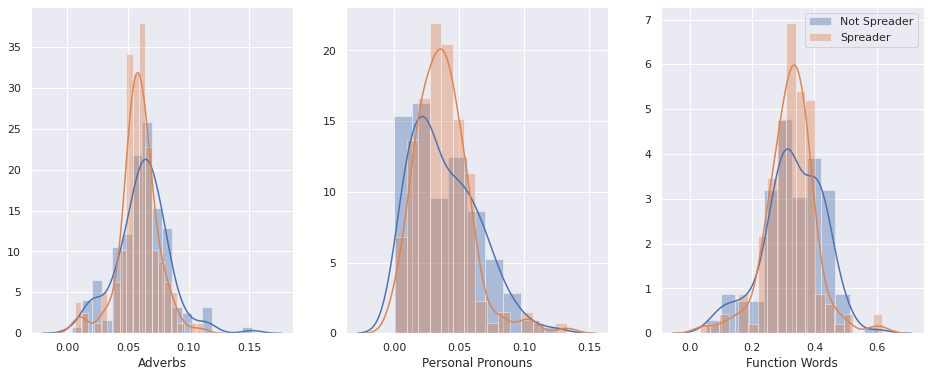

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 6)
ax1 = sns.distplot(false.adverbs, ax=ax1, label='Not Spreader')
ax1 = sns.distplot(true.adverbs, ax=ax1, label='Spreader')
ax2 = sns.distplot(false.personal_pronouns, ax=ax2, label='Not Spreader')
ax2 = sns.distplot(true.personal_pronouns, ax=ax2, label='Spreader')
ax3 = sns.distplot(false.function_words, ax=ax3, label='Not Spreader')
ax3 = sns.distplot(true.function_words, ax=ax3, label='Spreader')
ax1.set_xlabel('Adverbs')
ax2.set_xlabel('Personal Pronouns')
ax3.set_xlabel('Function Words')
plt.legend()
plt.savefig('tmp/img/function_words.pdf', bbox_inches='tight')
plt.show()

In [52]:
stats.ttest_ind(false.adverbs, true.adverbs)

Ttest_indResult(statistic=1.466918591206285, pvalue=0.14345271702201157)

In [54]:
stats.ttest_ind(false.personal_pronouns, true.personal_pronouns)

Ttest_indResult(statistic=0.5956026914975767, pvalue=0.5518927399731663)

In [53]:
stats.ttest_ind(false.function_words, true.function_words)

Ttest_indResult(statistic=0.8921512517707149, pvalue=0.37303168488286675)

Not normally distributed...

### Figure 2.

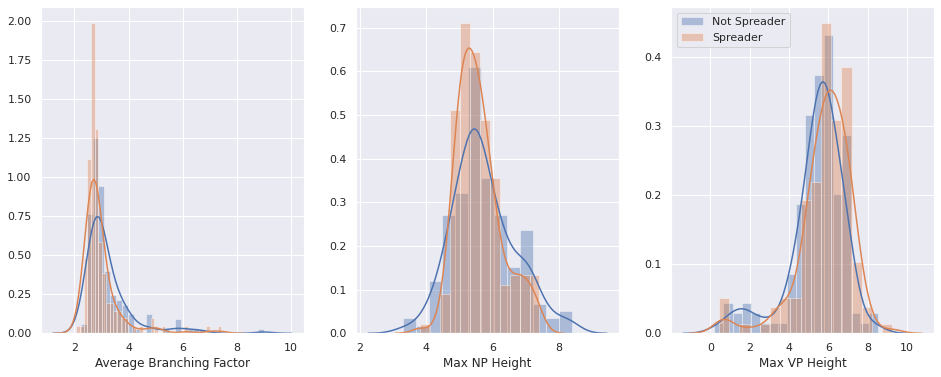

In [92]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 6)
ax1 = sns.distplot(false.avg_bf, ax=ax1, label='Not Spreader')
ax1 = sns.distplot(true.avg_bf, ax=ax1, label='Spreader')
ax2 = sns.distplot(false.max_np_height, ax=ax2, label='Not Spreader')
ax2 = sns.distplot(true.max_np_height, ax=ax2, label='Spreader')
ax3 = sns.distplot(false.max_vp_height, ax=ax3, label='Not Spreader')
ax3 = sns.distplot(true.max_vp_height, ax=ax3, label='Spreader')
ax1.set_xlabel('Average Branching Factor')
ax2.set_xlabel('Max NP Height')
ax3.set_xlabel('Max VP Height')
plt.legend()
plt.savefig('tmp/img/constituency_features.pdf', bbox_inches='tight')
plt.show()

### Figure 3.

In [88]:
false.columns

Index(['author', 'label', 'n', 'adverbs', 'articles', 'auxiliary_verbs',
       'conjunctions', 'impersonal_pronouns', 'personal_pronouns',
       'prepositions', 'quantifiers', 'function_words', 'avg_bf', 'height',
       'max_np_height', 'max_pp_height', 'max_vp_height', 'senti', 'senti_neg',
       'senti_pos', 'anger', 'distrust', 'c_adverbs', 'c_personal_pronouns',
       'c_function_words', 'f_adverbs', 'f_personal_pronouns',
       'f_function_words'],
      dtype='object')

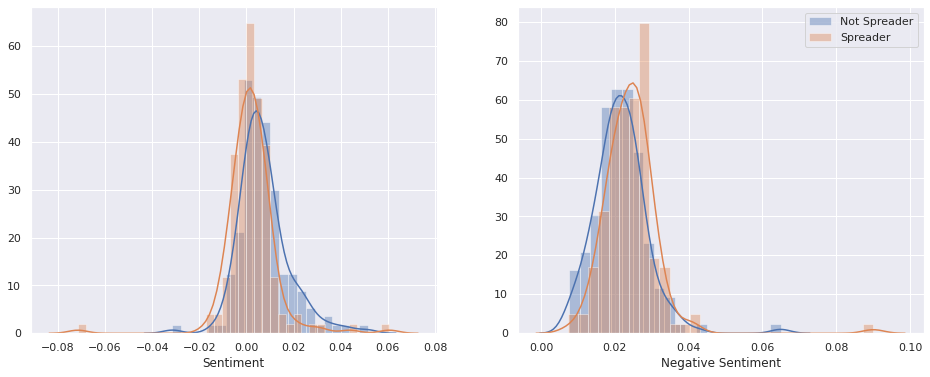

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
ax1 = sns.distplot(false.senti, ax=ax1, label='Not Spreader')
ax1 = sns.distplot(true.senti, ax=ax1, label='Spreader')
ax2 = sns.distplot(false.senti_neg, ax=ax2, label='Not Spreader')
ax2 = sns.distplot(true.senti_neg, ax=ax2, label='Spreader')
ax1.set_xlabel('Sentiment')
ax2.set_xlabel('Negative Sentiment')
plt.legend()
plt.savefig('tmp/img/senti_word_net.pdf', bbox_inches='tight')
plt.show()

### Figure 4.

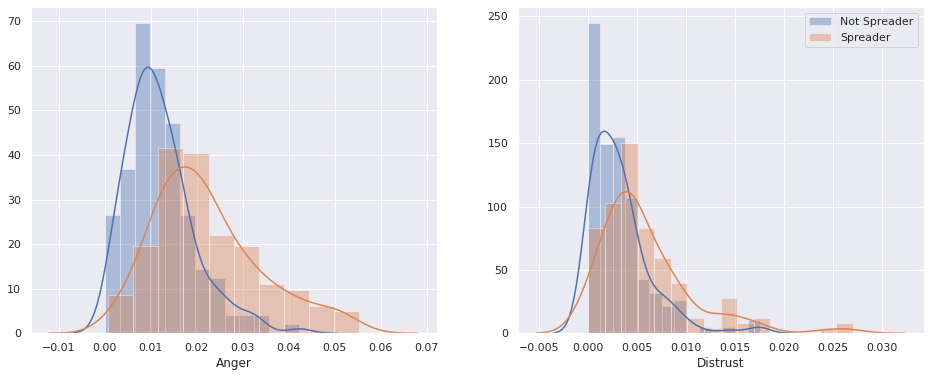

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 6)
ax1 = sns.distplot(false.anger, ax=ax1, label='Not Spreader')
ax1 = sns.distplot(true.anger, ax=ax1, label='Spreader')
ax2 = sns.distplot(false.distrust, ax=ax2, label='Not Spreader')
ax2 = sns.distplot(true.distrust, ax=ax2, label='Spreader')
ax1.set_xlabel('Anger')
ax2.set_xlabel('Distrust')
plt.legend()
plt.savefig('tmp/img/anger_distrust.pdf', bbox_inches='tight')
plt.show()